In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Define the problem

**Given**: dataset with various information about the Titanic passengers (age, sex, socio-economic status, cabin,...) 

**Goal**: analysis of what sorts of people were likely to survive.
    

## Prepare the data (Data Preprocessing)

### Load the data

We'll use the datasets provided by kaggle:[titanic/data](https://www.kaggle.com/c/titanic/data).

You can downloaded from here: [Titanic - all.zip](../datasets/Titanic/all.zip)

In [2]:
df_train = pd.read_csv("../datasets/Titanic/train.csv", index_col='PassengerId')
df_test = pd.read_csv("../datasets/Titanic/test.csv", index_col='PassengerId')

### Data variable descriptions:
<pre>
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5
</pre>

### Get insight of the data (Prepare and clean)

In [39]:
df_train.head()
# df_test.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
PassengerId                                                              
1                   0       3    1  22.0      1      0   7.2500         2
2                   1       1    0  38.0      1      0  71.2833         0
3                   1       3    0  26.0      0      0   7.9250         2
4                   1       1    0  35.0      1      0  53.1000         2
5                   0       3    1  35.0      0      0   8.0500         2

In [4]:
df_test.head(5)

Pclass                                          Name     Sex  \
PassengerId                                                                 
892               3                              Kelly, Mr. James    male   
893               3              Wilkes, Mrs. James (Ellen Needs)  female   
894               2                     Myles, Mr. Thomas Francis    male   
895               3                              Wirz, Mr. Albert    male   
896               3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

              Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
PassengerId                                                       
892          34.5      0      0   330911   7.8292   NaN        Q  
893          47.0      1      0   363272   7.0000   NaN        S  
894          62.0      0      0   240276   9.6875   NaN        Q  
895          27.0      0      0   315154   8.6625   NaN        S  
896          22.0      1      1  3101298  12.2875   NaN        S

In [5]:
print(df_train.info())
print(df_test.info())
# print(data_df.columns.values.tolist())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usag

#### Visualize with Seaborn

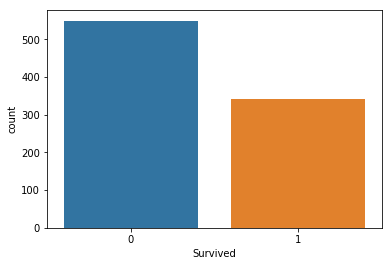

In [6]:
sns.countplot('Survived', data=df_train)

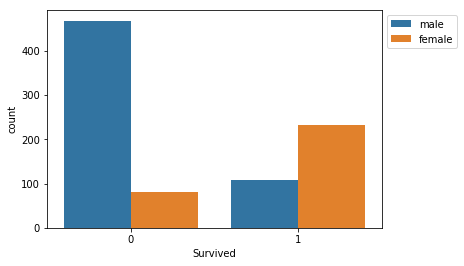

In [7]:
sns.countplot('Survived', hue='Sex', data=df_train)
# plt.title("Male/Female Survived")
plt.legend(bbox_to_anchor=(1, 1), loc=2)

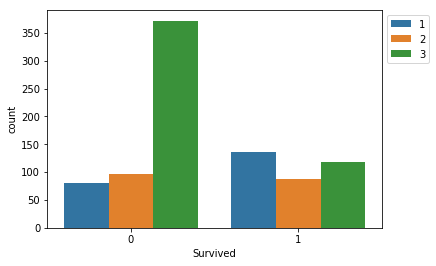

In [8]:
sns.countplot('Survived', hue='Pclass', data=df_train)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

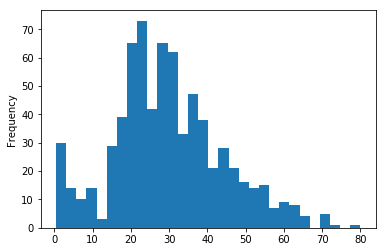

In [9]:
df_train['Age'].plot.hist(bins=30)

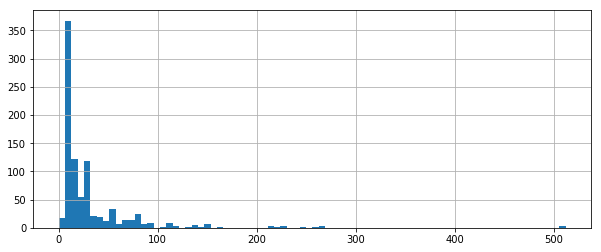

In [10]:
# df_train['Fare'].plot.hist()
df_train['Fare'].hist(bins=80, figsize=(10,4))

### Clean and wrangle the data

#### Check for NaN values

In [11]:
df_train.isnull().sum()
df_test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

Columns 'Age', 'Cabin' and 'Embarked' <span style="color:red">has NaN</span> values. We have to deal with them.

#### Deal with NaN values

In [12]:
def fill_nan_values(df):
    # Put port = Southampton for 'Embarked' null values:
    df["Embarked"] = df["Embarked"].fillna("S")
    
    # put the mean passengers age for 'Age' null values
    df["Age"] = df["Age"].fillna(df["Age"].median())
    
    # put 0 for cabin number for all 'Cabin' null values
    df["Cabin"] = df["Cabin"].fillna(0)
    
    # put the mean Fare for 'fare' null values:
    df["Fare"] = df["Fare"].fillna(df["Fare"].median())
    
    return df


In [13]:
df_train = fill_nan_values(df_train)
df_test = fill_nan_values(df_test)

In [14]:
# check again:
df_train.isnull().sum()
df_test.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

#### Categorical text data => to numbers

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       891 non-null object
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 123.5+ KB


In [16]:
def categories_to_numbers(df):
    if df['Sex'].dtype == "object":
        df["Sex"] = np.where(df["Sex"] == "male", 1,0) 
        
    if df['Embarked'].dtype == "object": 
        # is this more readable?
        # df.loc[df["Embarked"] == "S", "Embarked"] = 0
        # df.loc[df["Embarked"] == "C", "Embarked"] = 1
        # df.loc[df["Embarked"] == "Q", "Embarked"] = 2

        # Get the unique values of Embarked
        embarks = sorted(df['Embarked'].unique())

        # Generate a mapping of Embarked string to a numbers (0,1,...)    
        embarks_map = dict(zip(embarks, range(0, len(embarks) + 1)))

        # Transform Embarked from a string to a number representation
        df['Embarked'] = df['Embarked'].map(embarks_map).astype(int)
        
    print("df['Sex'].dtype", df['Sex'].dtype)
    print("df['Embarked'].dtype", df['Embarked'].dtype)

    return df

In [17]:
df_train = categories_to_numbers(df_train)
df_test = categories_to_numbers(df_test)
df_train.head()

df['Sex'].dtype int64
df['Embarked'].dtype int64
df['Sex'].dtype int64
df['Embarked'].dtype int64


Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name  Sex   Age  \
PassengerId                                                                 
1                                      Braund, Mr. Owen Harris    1  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0   
3                                       Heikkinen, Miss. Laina    0  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0   
5                                     Allen, Mr. William Henry    1  35.0   

             SibSp  Parch            Ticket     Fare Cabin  Embarked  
PassengerId                                                           
1                1      0         A/5 21171   7.2500     0         2  
2                1      0          PC 17599  71.2833   C85         0  
3                0      0  STON/O2. 3101282   7.9250     0         2  
4                1      0            113803  53.1000  C123         2  
5                0      0            373450   8.0500     0         2

## Select features

### Show Correlations

In [18]:
# show correlations
# df_train_corr = df_train.corr()
# sns.heatmap(df_train_corr,annot=True, cmap="Reds")

### Drop columns we won't use

In [19]:
useless_features = ['Name', 'Ticket','Cabin']

def drop_columns(df, columns):
    for col in columns:        
        if col in df.columns:
            df = df.drop(labels=col, axis=1)
            
    return df
    
df_train = drop_columns(df_train, useless_features)
df_test = drop_columns(df_test, useless_features)

## Separate the training data from the test data

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    df_train.drop('Survived',axis=1), 
    df_train['Survived'], 
    random_state=1)

print(f'X_train: {X_train[:5]}\n', f'y_train: {y_train[:5]}\n')
print(f'X_test: {X_test[:5]}\n', f'y_test: {y_test[:5]}\n')

X_train:              Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
PassengerId                                                    
36                1    1  42.0      1      0  52.0000         2
47                3    1  28.0      1      0  15.5000         1
454               1    1  49.0      1      0  89.1042         0
292               1    0  19.0      1      0  91.0792         0
749               1    1  19.0      1      0  53.1000         2
 y_train: PassengerId
36     0
47     0
454    1
292    1
749    0
Name: Survived, dtype: int64

X_test:              Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
PassengerId                                                    
863               1    0  48.0      0      0  25.9292         2
224               3    1  28.0      0      0   7.8958         2
85                2    0  17.0      0      0  10.5000         2
681               3    0  28.0      0      0   8.1375         1
536               2    0   7.0      0      2  26.2500 

## Choose the model

The problem is a categorization one, and we are going to try first with LogisticRegression.

In [41]:
from sklearn.linear_model import LogisticRegression

## Train the model (fit the model)

In [51]:
# instantiate and fit the model
model = LogisticRegression()
fitted = model.fit(X_train,y_train)

### Make predictions

In [43]:
predictions = model.predict(X_test)

In [44]:
# let's check the "learned" co-efficients:
print(fitted.intercept_)
print(fitted.coef_)

[3.89945813]
[[-0.82098181 -2.39627363 -0.02970952 -0.34282649  0.04727422  0.00379084
  -0.1644842 ]]


## Predict (classify unknown input sample)

In [45]:
y_pred = fitted.predict(X_test)

## Evaluate the model

In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       128
           1       0.83      0.67      0.74        95

   micro avg       0.80      0.80      0.80       223
   macro avg       0.81      0.79      0.79       223
weighted avg       0.81      0.80      0.80       223



In [52]:
from sklearn import metrics

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(metrics.accuracy_score(y_test, y_pred))

0.44419524653057546
0.8026905829596412
